## Barabasi-Albert Network

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Initialize the BA network with a fully connected 4-node network
G = nx.complete_graph(4)

# Number of nodes to add
N_target = 10000

# List to store degree distributions
degree_distributions = []


# Growth of the BA network
for t in range(4, N_target+1):
    node_degrees = list(G.degree())
    total_degree = sum(degree for _, degree in node_degrees)
    probabilities = [degree / total_degree for _, degree in node_degrees]
    selected_nodes = np.random.choice(G.nodes, size=4, p=probabilities, replace=False)
    new_node = t  # New node ID
    G.add_node(new_node)
    G.add_edges_from([(new_node, node) for node in selected_nodes])

    if t in [100, 1000, 10000]:
        degree_distribution = [degree for _, degree in G.degree()]
        degree_distributions.append(degree_distribution)



In [88]:
print(degree_distributions)

[[23, 28, 23, 19, 32, 27, 21, 31, 13, 13, 14, 14, 10, 8, 10, 7, 13, 4, 7, 12, 12, 9, 10, 12, 6, 6, 6, 13, 12, 6, 7, 7, 6, 11, 5, 7, 7, 9, 6, 7, 4, 4, 7, 4, 4, 5, 5, 13, 4, 8, 4, 7, 7, 5, 5, 9, 5, 5, 4, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 5, 6, 5, 5, 4, 4, 4, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4], [67, 80, 77, 57, 83, 106, 70, 81, 27, 47, 35, 44, 28, 23, 29, 34, 43, 9, 16, 30, 42, 23, 31, 48, 20, 15, 19, 59, 37, 19, 20, 24, 26, 44, 19, 21, 13, 23, 15, 20, 18, 9, 24, 10, 6, 18, 16, 40, 9, 19, 17, 9, 13, 6, 15, 39, 9, 21, 18, 11, 26, 13, 21, 18, 11, 16, 18, 5, 7, 11, 22, 22, 25, 9, 11, 12, 30, 15, 18, 21, 16, 22, 21, 11, 6, 13, 23, 26, 7, 14, 6, 10, 20, 14, 11, 14, 8, 5, 14, 18, 9, 20, 6, 17, 16, 8, 8, 14, 17, 16, 15, 14, 11, 14, 7, 16, 9, 17, 17, 14, 21, 14, 8, 21, 10, 18, 27, 21, 9, 15, 9, 16, 8, 9, 9, 8, 6, 19, 9, 18, 13, 6, 8, 11, 14, 5, 17, 9, 13, 6, 5, 5, 11, 13, 6, 13, 19, 10, 15, 8, 8, 12, 7, 4, 14, 8, 6, 4, 10, 10, 10, 5, 10, 6, 19, 10, 13, 5, 7, 5,

In [257]:
cols = ['#008795','#629CC0','#C8C0DD','#DEA8AB','#FFC980','#E3EA7A','#76C1CA','#999999']

In [90]:
# Defining the function to plot degree/cumulative distribution

def plot_degree(degree, number_of_bins=50, log_binning=True, base=2):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    """
    
    # We need to define the support of our distribution
    lower_bound = min(degree)
    upper_bound = max(degree)
    
    # And the bins
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base = base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    # Then we can compute the histogram using numpy
    y, __ = np.histogram(degree, 
                         bins=bins,
                         density=True)
    # Now, we need to compute for each y the value of x
    x = bins[1:] - np.diff(bins)/2.0
        
    return x, y

### Fitting Powerlaw for the degree exponents

In [100]:
import powerlaw

pw_law1 = degree_distributions[0]
pw_law2 = degree_distributions[1]
pw_law3 = degree_distributions[2]

results_1 = powerlaw.Fit(pw_law1,verbose=False)
results_2 = powerlaw.Fit(pw_law2,verbose=False)
results_3 = powerlaw.Fit(pw_law3,verbose=False)

round_results_1 = round(results_1.power_law.alpha, 3)
round_results_2 = round(results_2.power_law.alpha, 3)
round_results_3 = round(results_3.power_law.alpha, 3)

print("Alpha for 100 nodes is: ", results_1.power_law.alpha)
print("Xmin for 100 nodes is: ", results_1.power_law.xmin)

print("Alpha for 1000 nodes is: ", results_2.power_law.alpha)
print("Xmin for 100 nodes is: ", results_2.power_law.xmin)

print("Alpha for 10000 nodes is: ", results_3.power_law.alpha)
print("Xmin for 100 nodes is: ", results_3.power_law.xmin)



Alpha for 100 nodes is:  3.076613341026858
Xmin for 100 nodes is:  4.0
Alpha for 1000 nodes is:  3.06367578134493
Xmin for 100 nodes is:  5.0
Alpha for 10000 nodes is:  2.939008535949135
Xmin for 100 nodes is:  18.0


### Plotting degree distributions as the BA network grows 

In [92]:
x1, y1 = plot_degree(degree_distributions[0], number_of_bins=80, log_binning=True, base=2)
x2, y2 = plot_degree(degree_distributions[1], number_of_bins=80, log_binning=True, base=2)
x3, y3 = plot_degree(degree_distributions[2], number_of_bins=80, log_binning=True, base=2)

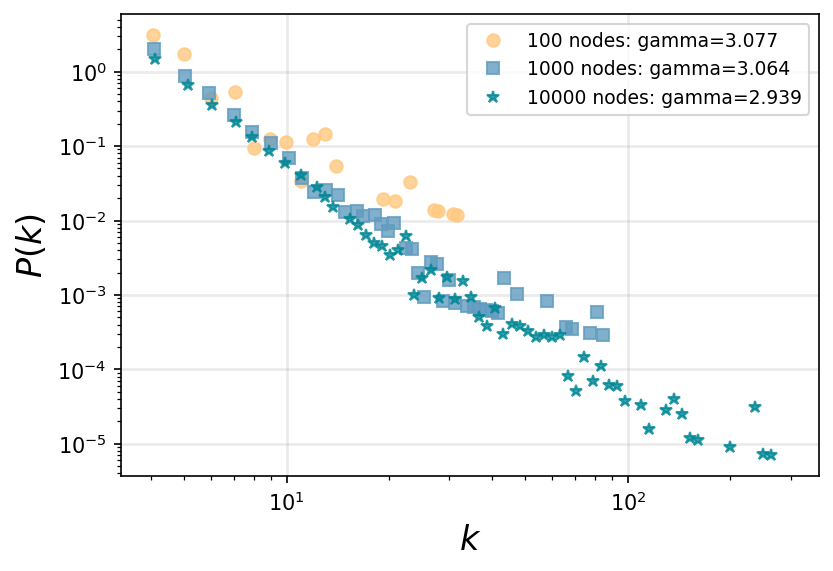

In [99]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x1, y1,'o', color=cols[4], label=f'100 nodes: gamma={round_results_1}', alpha=0.8)
ax.loglog(x2, y2,'s', color=cols[1], label=f'1000 nodes: gamma={round_results_2}', alpha=0.8)
ax.loglog(x3, y3,'*', color=cols[0], label=f'10000 nodes: gamma={round_results_3}', alpha=0.8)


ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)

ax.legend(fontsize=9)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

plt.show()

### Plotting the cumulative degree distributions as the BA network grows

In [135]:
def plot_ccdf(degree_sequence):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    Parameters
    ----------
    degree_sequence (np.ndarray or list):
        a vector of length N that corresponds to the degree, k_i, of every
        node, v_i, in the network

    Returns
    -------
    bin_edges[0:-2], ccdf[:-1] (np.ndarray):
        the support and probability values of the degree distribution
    
    """
    
    data_size = len(degree_sequence)

    # Find the proper values for the bins
    data_set = sorted(set(degree_sequence))
    bins = np.append(data_set, data_set[-1]+1)

    # Use the np.histogram function to bin the data
    counts, bin_edges = np.histogram(degree_sequence, bins=bins, density=False)

    counts = counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    ccdf = 1 - cdf
    
    return bin_edges[0:-2], ccdf[:-1]

In [155]:
bin_edges_1, ccdf_1 = plot_ccdf(degree_distributions[0])
bin_edges_2, ccdf_2 = plot_ccdf(degree_distributions[1])
bin_edges_3, ccdf_3 = plot_ccdf(degree_distributions[2])

Text(0.5, 1.0, 'CD for $10^4$ nodes')

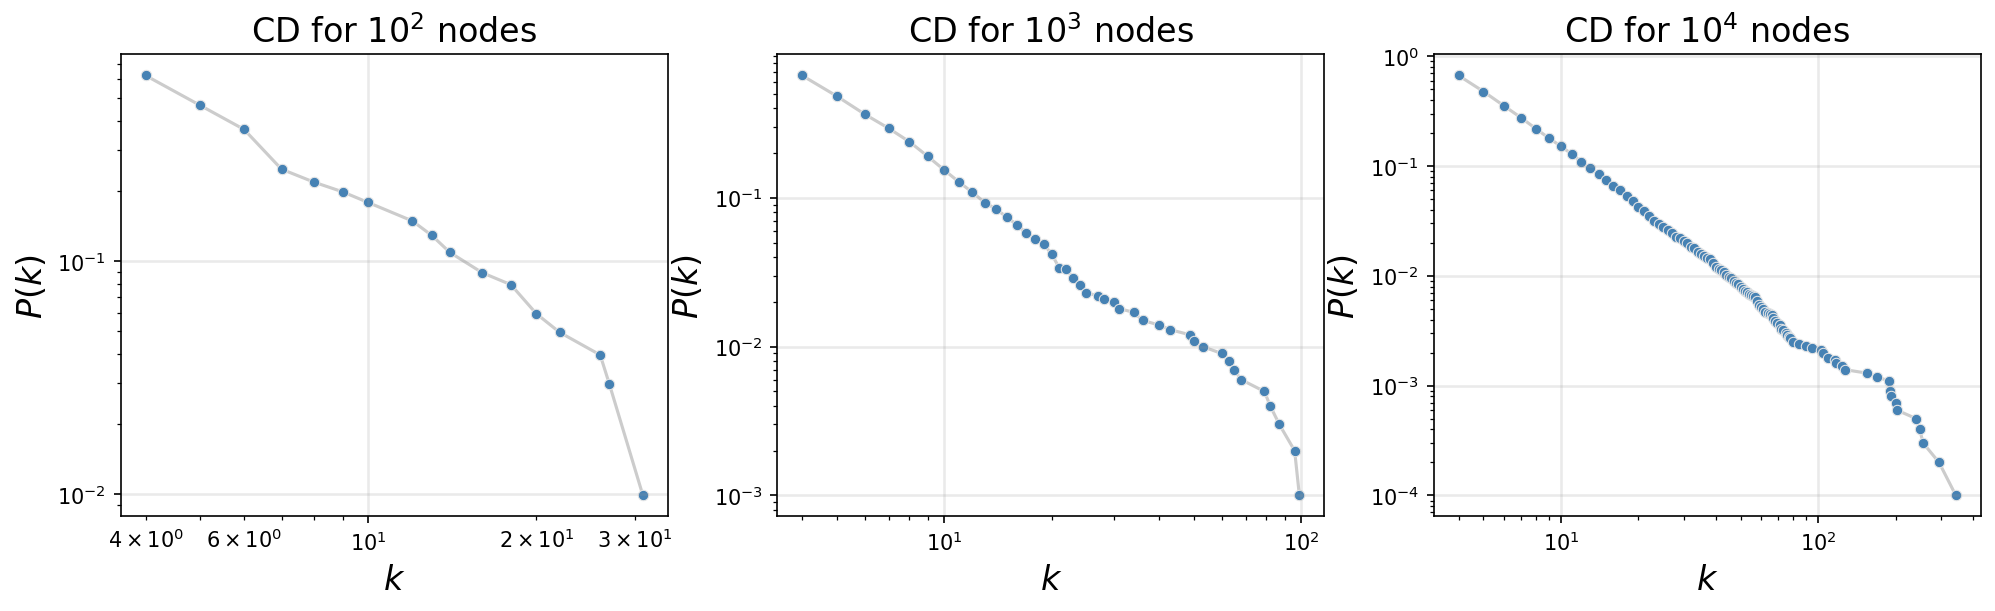

In [156]:
fig, ax = plt.subplots(1,3,figsize=(16,4),dpi=150)


ax[0].plot(bin_edges_1, ccdf_1, color='.8', zorder=0)
ax[0].scatter(bin_edges_1, ccdf_1, lw=0.5, c='steelblue', ec='.9', s=25)
ax[0].set_yscale('log')
ax[0].set_xscale('log')

ax[1].plot(bin_edges_2, ccdf_2, color='.8', zorder=0)
ax[1].scatter(bin_edges_2, ccdf_2, lw=0.5, c='steelblue', ec='.9', s=25)
ax[1].set_yscale('log')
ax[1].set_xscale('log')

ax[2].plot(bin_edges_3, ccdf_3, color='.8', zorder=0)
ax[2].scatter(bin_edges_3, ccdf_3, lw=0.5, c='steelblue', ec='.9', s=25)
ax[2].set_yscale('log')
ax[2].set_xscale('log')

# # ax.set_xlim(1e0,5e2)
# # ax.set_ylim(1e-4,1)
# # ax.set_xlim(min(degree_sequence), max(degree_sequence))
# # ax.set_ylim(min(ccdf),1)



ax[0].set_xlabel(r"$k$", fontsize=16)
ax[0].set_ylabel(r"$P(k)$", fontsize=16)
ax[0].grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')
ax[0].set_title(r'CD for $10^2$ nodes',fontsize=16)

ax[1].set_xlabel(r"$k$", fontsize=16)
ax[1].set_ylabel(r"$P(k)$", fontsize=16)
ax[1].grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')
ax[1].set_title(r'CD for $10^3$ nodes',fontsize=16)

ax[2].set_xlabel(r"$k$", fontsize=16)
ax[2].set_ylabel(r"$P(k)$", fontsize=16)
ax[2].grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')
ax[2].set_title(r'CD for $10^4$ nodes',fontsize=16)


# for i in range(0,3):
#     ax[i].plot(bin_edges_i, ccdf_, color='.8', zorder=0)
#     ax[i].scatter(bin_edges_1, ccdf_1, lw=0.5, c='steelblue', ec='.9', s=25)
#     ax[i].set_yscale('log')
#     ax[i].set_xscale('log')
    
#     ex = i +2 # variable to increment the number of nodes in the title
#     ax[i].set_xlabel(r"$k$", fontsize=16)
#     ax[i].set_ylabel(r"$P(k)$", fontsize=16)
#     ax[i].grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')
#     ax[i].set_title(r'CD for $10^{'+str(ex)+'}$ nodes',fontsize=16)

# plt.show()

### Average Clustering Coefficient of the BA network

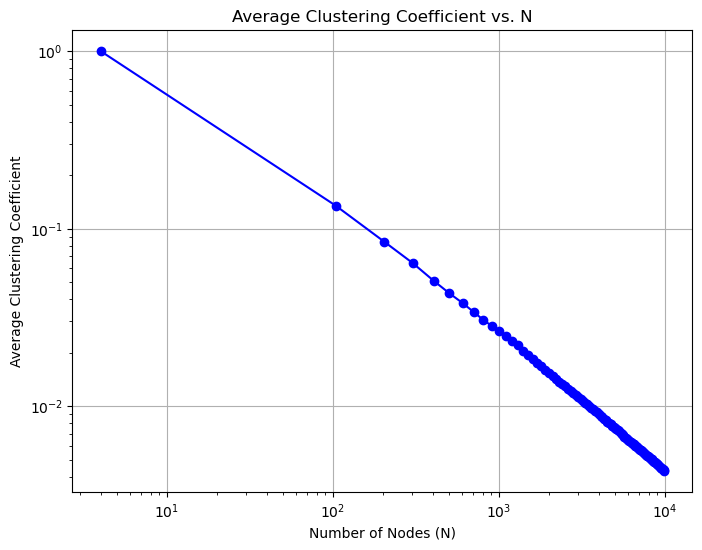

In [7]:
# Plot average clustering coefficient as a function of N
plt.figure(figsize=(8, 6))
plt.loglog(N_values[::100], avg_clustering_values[::100], marker='o', linestyle='-', color='b')
plt.title("Average Clustering Coefficient vs. N")
plt.xlabel("Number of Nodes (N)")
plt.ylabel("Average Clustering Coefficient")
plt.grid(True)
plt.show()

### Measuring the degree dynamics of one of the initial nodes and of the nodes added to the network at times t = 100, t = 1, 000 and t = 5, 000

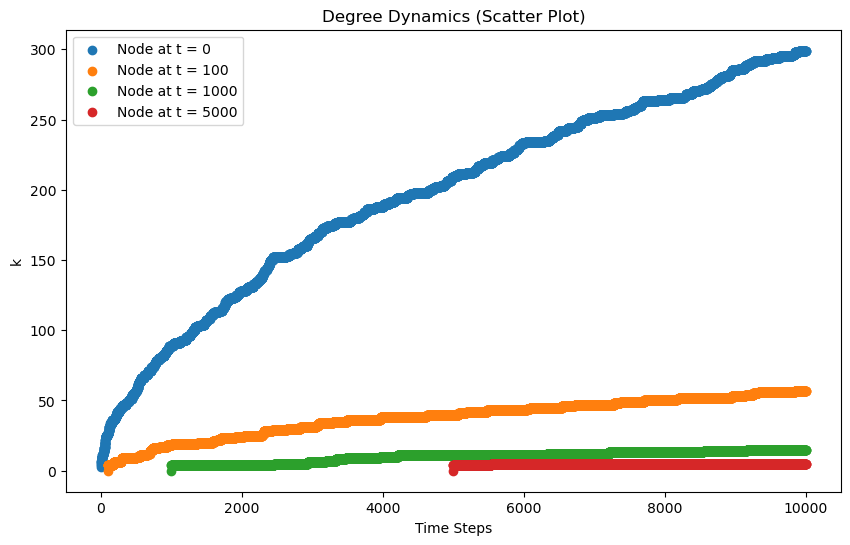

In [116]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Initialize the BA network with a fully connected 4-node network
G = nx.complete_graph(4)

# Number of nodes to add
N_target = 10000

nodes_to_track = [0, 100, 1000, 5000]

# Storing degree distributions for each node to track
degree_distributions = {node: [] for node in nodes_to_track}
node_arrival_times = {node: None for node in nodes_to_track}

# Growth of the BA network
for t in range(4, N_target + 1):
    node_degrees = dict(G.degree())
    total_degree = sum(degree for degree in node_degrees.values())
    probabilities = [degree / total_degree for degree in node_degrees.values()]
    selected_nodes = np.random.choice(list(G.nodes), size=4, p=probabilities, replace=False)
    new_node = t  # New node ID
    G.add_node(new_node)
    G.add_edges_from([(new_node, node) for node in selected_nodes])

    # Checking if any of the tracked nodes has arrived at the current time step
    for node in nodes_to_track:
        if node_arrival_times[node] is None and t >= node:
            node_arrival_times[node] = t

    # Tracking and recording degrees of nodes at specified time steps
    # Appending zeros was giving me an ugly line at the bottom so decided to do this instead 
    for node in nodes_to_track:
        if node_arrival_times[node] is not None:
            degree_distributions[node].append(node_degrees.get(node, 0))

# Plotting
plt.figure(figsize=(10, 6))
for node in nodes_to_track:
    time_steps = range(node_arrival_times[node], len(degree_distributions[node]) + node_arrival_times[node])
    degrees = degree_distributions[node]
    plt.scatter(time_steps, degrees, label=f"Node at t = {node}")

plt.xlabel("Time Steps")
plt.ylabel("k")
plt.title("Degree Dynamics (Scatter Plot)")
plt.legend()
plt.show()


### The above graph shows the "first mover" advantage as observed in real networks (example economic networks)

## Generating scale free(heavy tailed) degree distributions with the optimization, link selection and copying models

### a) Implementing the optimization model

In [62]:
import random
import math

def node_pos(n):
    """
    Generating a list of tuples containing node positions for a network size n
    """
    positions = [(random.uniform(0, 1), random.uniform(0, 1)) for _ in range(n)]
    return positions


def optimize_growth(d, G, source_id):
    """
    Selects the best neighbor after evaluating cost
    """
    source_pos = G.nodes[source_id]['position']
    potential_neighbors = G.subgraph(range(source_id))
    cost_list = {}

    for i in potential_neighbors.nodes:
        if i != source_id:
            neighbor_pos = G.nodes[i]['position']
            x_source, y_source = source_pos
            x_neighbor, y_neighbor = neighbor_pos
            distance = math.sqrt((x_neighbor - x_source)**2 + (y_neighbor - y_source)**2)
            cost = d * distance + nx.shortest_path_length(potential_neighbors, source=i, target=0)
            cost_list[i] = cost

    selected_neighbor = min(cost_list, key=cost_list.get)
    return selected_neighbor


def optimized_model(d, n):
    """
    Connecting the nodes based on their positions
    """
    G = nx.Graph()
    positions = node_pos(n)  # Generate node positions using the optimized function

    for i in range(n):
        G.add_node(i)
        G.nodes[i]['position'] = positions[i]

    for i in range(1, n):
        link = optimize_growth(d, G, i) 
        G.add_edge(i, link)

    return G




In [60]:
# Slightly different from the above degree distribution plot function 
# to make the plots fit better

def plot_degree_distribution(G, log_bins=True, num_bins=10):
    """
    Performs log binning to make output look not ugly
    """
    degree = dict(G.degree())
    degree = list(degree.values())
    if log_bins:
        bin_edges = 10 ** np.linspace(
            np.log10(min(degree)),
            np.log10(max(degree)),
            num_bins + 1
        )
    else:
        bin_edges = np.linspace(min(degree), max(degree), num_bins + 1)

    hist, edges = np.histogram(degree, bins=bin_edges, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    return bin_centers, hist

### Plotting the degree distributions as the optimization model grows

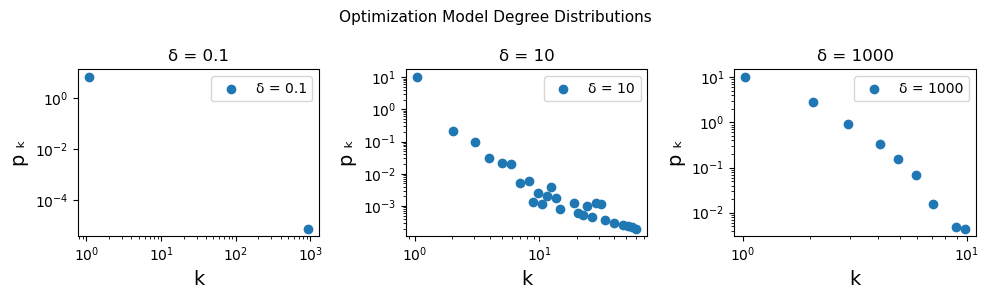

In [63]:
# Plotting figures for different deltas
deltas = [0.1, 10, 1000]
checkpoints_list = [optimized_model(delta, 1000) for delta in deltas]

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
for i, delta in enumerate(deltas):
    x, y = plot_degree_distribution(checkpoints_list[i], log_bins=True, num_bins=50)
    ax[i].scatter(x, y, label=f'\u03B4 = {delta}')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel('k', fontsize=14)
    ax[i].set_ylabel('p \u2096', fontsize=14)
    ax[i].set_title(f'\u03B4 = {delta}')
    ax[i].legend()

fig.suptitle('Optimization Model Degree Distributions', fontsize=11)
plt.tight_layout()
plt.show()

### Implementing the Link Selection model

In [202]:
import networkx as nx
import random
import matplotlib.pyplot as plt


def link_selection_model(N_target):
    """
    Function to implement the link selection model with preferential attachment
    """
    # Create an initial network with two nodes connected to each other
    G = nx.Graph()
    G.add_edge(0, 1)

    for t in range(2, N_target):
        # Calculating the probability of choosing a link 
        total_degree = sum(dict(G.degree()).values())
        
        # Using link[1] since link here is a tuple, where link[0] is one node at one 
        # end of the edge, and link[1] is the other node at the opposite end of the edge.
        
        link_probabilities = [G.degree(link[1]) / total_degree for link in G.edges()]
        selected_link = random.choices(list(G.edges()), weights=link_probabilities, k=1)[0]

        # Connect the new node to one of the two nodes at the ends of the selected link
        new_node = t
        existing_node = selected_link[random.randint(0, 1)]
        G.add_edge(new_node, existing_node)

    return G

# Parameters
N_target = 1000  

# Calling the link selection model function
G = link_selection_model(N_target)

# Degree distribution of the network
degree_distribution = [degree for _, degree in G.degree()]


In [198]:
def plot_degree(degree, number_of_bins=50, log_binning=True, base=2):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    Parameters
    ----------
    degree (np.ndarray or list):
        a vector of length N that corresponds to the degree, k_i, of every
        node, v_i, in the network

    number_of_bins (int):
        length of output vectors
    
    log_binning (bool)
        if you are plotting on a log-log axis, then this is useful
    
    base (int):
        log base, defaults to 2
        
    Returns
    -------
    x, y (np.ndarray):
        the support and probability values of the degree distribution
    
    """
    
    # We need to define the support of our distribution
    lower_bound = min(degree)
    upper_bound = max(degree)
    
    # And the bins
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base = base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    # Then we can compute the histogram using numpy
    y, __ = np.histogram(degree, 
                         bins=bins,
                         density=True)
    # Now, we need to compute for each y the value of x
    x = bins[1:] - np.diff(bins)/2.0
        
    return x, y

In [199]:
x1, y1 = plot_degree(degree_distribution, number_of_bins=80, log_binning=True, base=2)

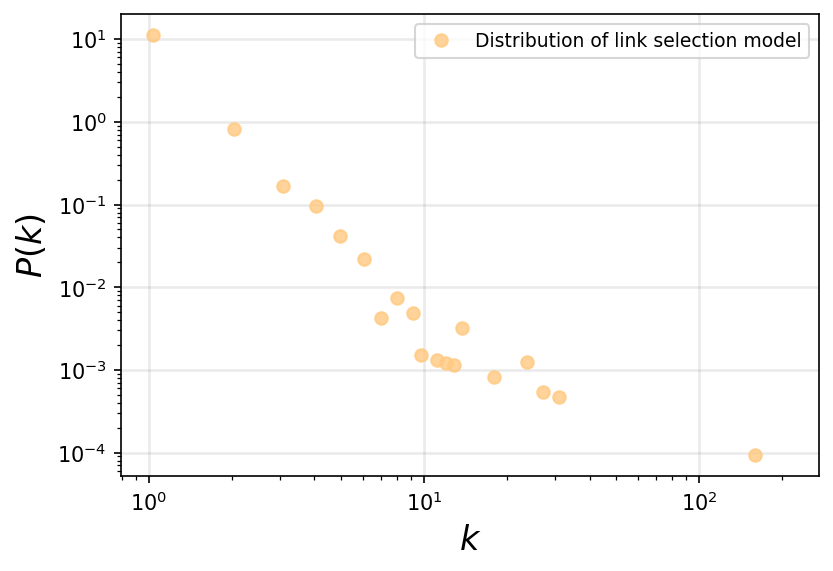

In [200]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x1, y1,'o', color=cols[4], label='Distribution of link selection model', alpha=0.8)


ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)

ax.legend(fontsize=9)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

plt.show()

### Implementing the copying model

In [168]:
import networkx as nx
import random
import matplotlib.pyplot as plt


def copying_model(N_target, p):
    '''
    Function to implement the copying model with the specified probability distribution
    '''
    
    # Create an initial network with two nodes connected to each other
    G = nx.Graph()
    G.add_edge(0, 1)

    for t in range(2, N_target):
        # Probability of choosing a node with formulas from the textbook
        node_probabilities = [(p / t) + ((1 - p) / (2 * len(G.edges()))) * G.degree(node) for node in G.nodes()]
        total_probability = sum(node_probabilities)
        node_probabilities = [prob / total_probability for prob in node_probabilities]

        # Select a target node to connect to based on probabilities
        # Replace=False to not allow any repeats 
        target_node = np.random.choice(list(G.nodes()), p=node_probabilities, size=1, replace=False)[0]

        # Decide whether to connect directly or copy a link
        if random.random() < p:
            # Connect directly to the target node
            G.add_edge(t, target_node)
        else:
            # Copy a link from the target node
            neighbor_links = list(G.edges(target_node))
            if neighbor_links:
                copied_link = random.choice(neighbor_links)
                G.add_edge(t, copied_link[1])

    return G

# Parameters
N_target = 1000  
p = 1  # Probability of connecting directly to the target node

# Calling the copying model function
G = copying_model(N_target, p)

# Degree distribution of the network
degree_distribution = [degree for _, degree in G.degree()]


In [170]:
x1, y1 = plot_degree(degree_distribution, number_of_bins=80, log_binning=True, base=2)

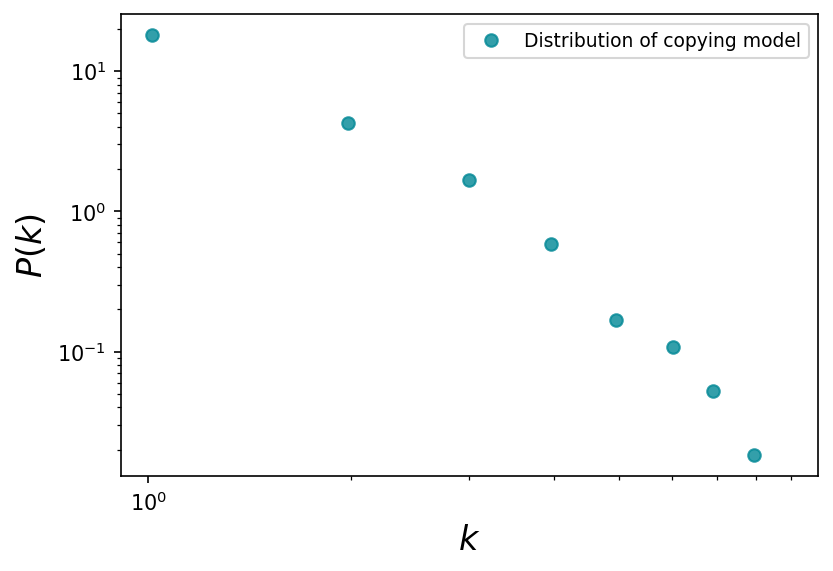

In [171]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x1, y1,'o', color=cols[0], label='Distribution of copying model', alpha=0.8)


ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)

ax.legend(fontsize=9)

plt.show()

### Implementing the copying model for different probabilities

In [158]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

def copying_model(N_target, probabilities):
    '''
    Function to implement the copying model with the specified probability distribution
    '''
    
    degree_distributions = {p: [] for p in probabilities}
    
    for p in probabilities:
        # Create an initial network with two nodes connected to each other
        G = nx.Graph()
        G.add_edge(0, 1)

        for t in range(2, N_target):
            # Probability of choosing a node with formulas from the textbook
            node_probabilities = [(p / t) + ((1 - p) / (2 * len(G.edges())) * G.degree(node)) for node in G.nodes()]
            total_probability = sum(node_probabilities)
            node_probabilities = [prob / total_probability for prob in node_probabilities]

            # Select a target node to connect to based on probabilities
            # Replace=False to not allow any repeats 
            target_node = np.random.choice(list(G.nodes()), p=node_probabilities, size=1, replace=False)[0]

            # Decide whether to connect directly or copy a link
            if random.random() < p:
                # Connect directly to the target node
                G.add_edge(t, target_node)
            else:
                # Copy a link from the target node
                neighbor_links = list(G.edges(target_node))
                if neighbor_links:
                    copied_link = random.choice(neighbor_links)
                    G.add_edge(t, copied_link[1])
        
        degree_distribution = [degree for _, degree in G.degree()]
        degree_distributions[p] = degree_distribution
    
    return degree_distributions

# Parameters
N_target = 1000  
probabilities = [0.1, 0.5, 1]  

# Calling the copying model function
degree_distributions = copying_model(N_target, probabilities)


In [163]:
x1, y1 = plot_degree(degree_distributions.get(0.1), number_of_bins=80, log_binning=True, base=2)
x2, y2 = plot_degree(degree_distributions.get(0.5), number_of_bins=80, log_binning=True, base=2)
x3, y3 = plot_degree(degree_distributions.get(1), number_of_bins=80, log_binning=True, base=2)

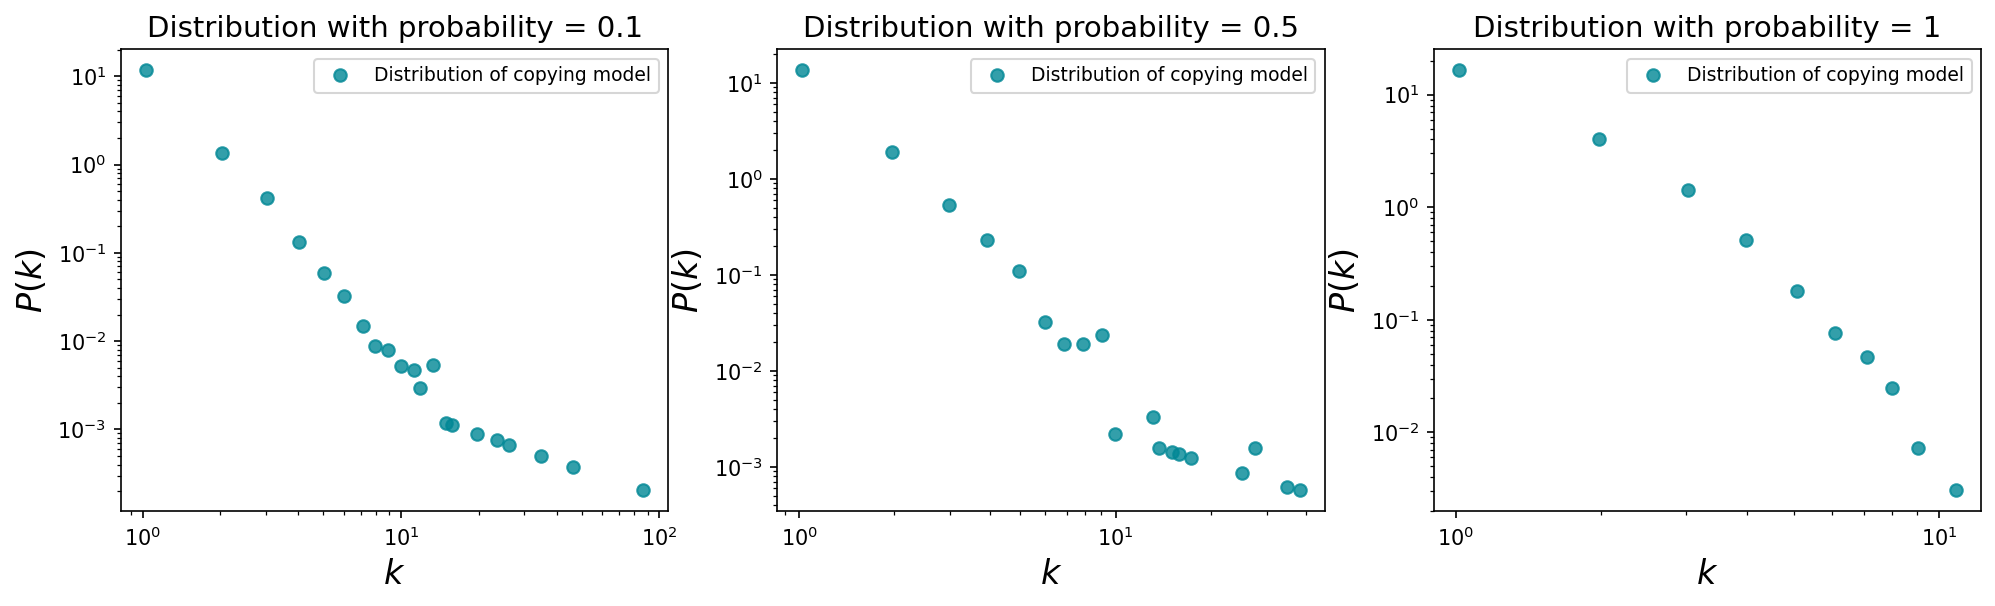

In [166]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,3,figsize=(16,4),dpi=150)

# Plots
ax[0].loglog(x1, y1,'o', color=cols[0], label='Distribution of copying model', alpha=0.8)
ax[0].set_xlabel(r"$k$", fontsize=16)
ax[0].set_ylabel(r"$P(k)$", fontsize=16)
ax[0].legend(fontsize=9)
ax[0].set_title('Distribution with probability = 0.1',fontsize=14)

ax[1].loglog(x2, y2,'o', color=cols[0], label='Distribution of copying model', alpha=0.8)
ax[1].set_xlabel(r"$k$", fontsize=16)
ax[1].set_ylabel(r"$P(k)$", fontsize=16)
ax[1].legend(fontsize=9)
ax[1].set_title('Distribution with probability = 0.5',fontsize=14)

ax[2].loglog(x3, y3,'o', color=cols[0], label='Distribution of copying model', alpha=0.8)
ax[2].set_xlabel(r"$k$", fontsize=16)
ax[2].set_ylabel(r"$P(k)$", fontsize=16)
ax[2].legend(fontsize=9)
ax[2].set_title('Distribution with probability = 1',fontsize=14)


plt.show()

## Showing the preferential attachment for the 4 different models discussed above

### Preferential Attachment for BA model

In [191]:
def ba_model(N,m):    
    # Initialize the BA network with a fully connected 4-node network
    G = nx.complete_graph(4)

    # Number of nodes to add

    # List to store degree distributions
    neighbor_degrees = []


    for t in range(4, N+1):
        node_degrees = list(G.degree())
        total_degree = sum(degree for _, degree in node_degrees)
        probabilities = [degree / total_degree for _, degree in node_degrees]
        selected_nodes = np.random.choice(G.nodes, size=4, p=probabilities, replace=False)
        new_node = t  # New node ID
        G.add_node(new_node)
        G.add_edges_from([(new_node, node) for node in selected_nodes])
        
        
    return G

In [193]:
ba_initial = ba_model(10000,1)

def prefattach_ba(N, G):
    """
    Function that computes the preferential attachment for the BA model
    """
    degrees = []
    prefattach = []
    
    # for intitial nodes
    node_degrees = list(G.degree())
    total_degree = sum(degree for _, degree in node_degrees)
    probabilities = [degree / total_degree for _, degree in node_degrees]
    
    
    for t in range(4,N):
        selected_node = np.random.choice(G.nodes, size=4, p=probabilities, replace=False)
        G.add_node(t)
        target = selected_node[0]
        degrees.append(G.degree(target))
        
        G.add_edge(t, target)
        node_degrees = list(G.degree())
        total_degree = sum(degree for _, degree in node_degrees)
        
        prefattach.append((G.degree[target]-1)/total_degree)
        
        probabilities = [degree / total_degree for _, degree in node_degrees]
        
    return degrees, prefattach
        

In [194]:
h1, j1 = prefattach_ba(1000, ba_initial)

### Preferential Attachment for Link Selection model

In [204]:
# Calling the link selection model function
link_sel_init = link_selection_model(10000)

In [208]:
def prefattach_link(N,G):
    """
    Function that computes the preferential attachment for the link model
    """
    degrees = []
    prefattach = []
    
    for t in range(0, N):
        total_degree = sum(dict(G.degree()).values())    
        link_probabilities = [G.degree(link[1]) / total_degree for link in G.edges()]
        selected_link = random.choices(list(G.edges()), weights=link_probabilities, k=1)[0]
        chosen_node = selected_link[random.randint(0, 1)]
        degrees.append(G.degree[chosen_node])
        
        
        prefattach.append((G.degree[chosen_node]-1)/total_degree)
        
        G.add_node(t)
        G.add_edge(t, chosen_node)
        
    return degrees, prefattach

In [209]:
h2, j2 = prefattach_link(1000, link_sel_init)

### Preferential Attachment for copying model

In [212]:
copy_init = copying_model(1000, 0.1) # initializing with p =0.1

In [245]:
def prefattach_copy(N,G,p):
    """
    Function that computes the preferential attachment for the copying model
    """
    degrees = []
    prefattach = []
    
    for t in (0, N):
        G.add_node(t)
    for t in range(2, N):
        # Probability of choosing a node with formulas from the textbook
        node_probabilities = [(p / t) + ((1 - p) / (2 * len(G.edges()))) * G.degree(node) for node in G.nodes()]
        total_probability = sum(node_probabilities)
        node_probabilities = [prob / total_probability for prob in node_probabilities]

        # Select a target node to connect to based on probabilities
        # Replace=False to not allow any repeats 
        target_node = np.random.choice(list(G.nodes()), p=node_probabilities, size=1, replace=False)[0]
        degrees.append(G.degree(target_node))

        # Decide whether to connect directly or copy a link
        if random.random() < p:
            # Connect directly to the target node
            G.add_edge(t, target_node)
        else:
            # Copy a link from the target node
            neighbor_links = list(G.edges(target_node))
            if neighbor_links:
                copied_link = random.choice(neighbor_links)
                G.add_edge(t, copied_link[1])
                
        prefattach.append((G.degree[target_node]-1)/total_degree)
        
    return degrees, prefattach        
        

In [246]:
h3, j3 = prefattach_copy(1000, copy_init, 0.1)

### Preferential Attachment for Optimization model

In [220]:
optimized_init = optimized_model(10, 1000)

In [254]:
def prefattach_opt(D,N,G):
    """
    Function that computes the preferential attachment for the optimization model
    """
    degrees = []
    prefattach = []
    
    pos = node_pos(N)
    
    # Adjusted 
    for t in range(1000+N):
        G.add_node(i)
        G.nodes[i]['position'] = pos[i]
        
    for t in range(1, N):
        target_node = optimize_growth(D, G, t)
        degrees.append(G.degree[target_node])
        total_degree = sum(dict(G.degree()).values())
        prefattach.append((G.degree[target_node]-1)/total_degree)
        G.add_edge(t, target_node)
        
    return degrees, prefattach

In [255]:
h4, j4 = prefattach_opt(10, 1000, optimized_init)

### Making the plots

Text(0.5, 1.0, 'Preferential attachment for optimization model')

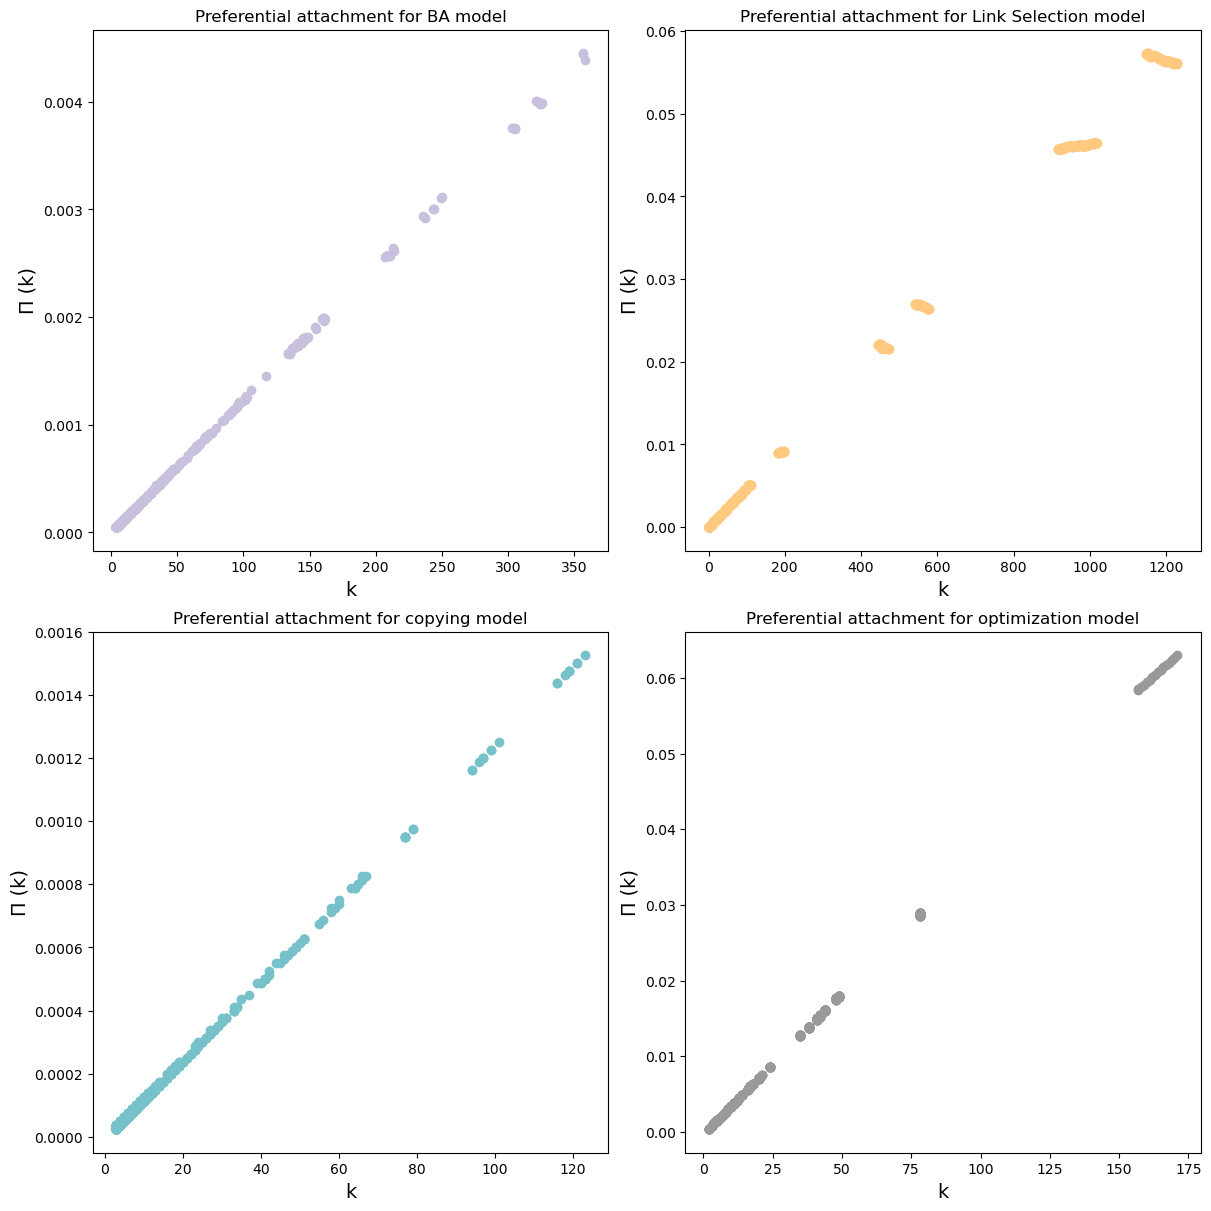

In [260]:
fig, ax = plt.subplots(2,2,layout = 'constrained',figsize=(12, 12))

# Plot for BA model
ax[0, 0].scatter(h1,j1, label = 'BA Model', c = cols[2])
ax[0, 0].set_xlabel('k',fontsize=14)
ax[0, 0].set_ylabel('\u03A0 (k)',fontsize=14)
ax[0, 0].set_title('Preferential attachment for BA model')

# Plot for Link Selection Model
ax[0, 1].scatter(h2,j2, label = 'Link Selection Model', c = cols[4])
ax[0, 1].set_xlabel('k',fontsize=14)
ax[0, 1].set_ylabel('\u03A0 (k)',fontsize=14)
ax[0, 1].set_title('Preferential attachment for Link Selection model')

# Plot for Copying model
ax[1, 0].scatter(h3,j3, label = 'Copying Model', c = cols[6])
ax[1, 0].set_xlabel('k',fontsize=14)
ax[1, 0].set_ylabel('\u03A0 (k)',fontsize=14)
ax[1, 0].set_title('Preferential attachment for copying model')


# Plot for optimization model
ax[1, 1].scatter(h4,j4, label = 'Optimization Model', c = cols[7])
ax[1, 1].set_xlabel('k',fontsize=14)
ax[1, 1].set_ylabel('\u03A0 (k)',fontsize=14)
ax[1, 1].set_title('Preferential attachment for optimization model')


From the above graphs we can see the characteristics of each of the models:
1. In the BA model we can see how few nodes have significantly higher degree than majority of the nodes as the network grows. Which is in tune with the rich getting richer phenomenon
2. In the Link Selection model we can see that new nodes being added to the network select nodes with higher degrees as their neighbors. Therefore you can see clusters forming where nodes with similar degrees tend to connect with each other 
3. Since choosing whether to connect to either a node or a nodes neighbor in the copying model depends on probability 'p' and '1-p'. Since we used a lower probability here, you can see the model mimicing more scale free property like the BA model unlike if we would have made the probability high which would have resulted in a more random network
4. In the optimization model the new nodes connect to nodes on the network based on optimizing a cost function. Therefore we can see that nodes link to other nodes based on their position in our case 